# Operations on NumPy arrays

One of the most powerful features of NumPy is its ability to manipulate entire arrays of numbers in one go.

## Numerical operations

In Python, you can multiply a single number by another to get a new number:

In [1]:
single_number = 3.14
single_number * 2

6.28

However, if you try to multiply a list by a number it will give a perhaps strange result:

In [2]:
python_list = [3.14, 2.71, 1.18]
python_list * 2

[3.14, 2.71, 1.18, 3.14, 2.71, 1.18]

This is hapenning because Python's lists are not restricted to only hold numbers, nor must they only hold one consistent type, and so they do not have any special logic to account for the case where they *do* only have numbers in them. The only safe way to interpret `*` that works for all Python lists is "duplicate the array".

NumPy, however, is designed to deal with numerical data and so interprets the request differently:

In [3]:
import numpy as np

In [4]:
numpy_array = np.array([3.14, 2.71, 1.18])
numpy_array * 2

array([6.28, 5.42, 2.36])


Here, each number has been multiplied by 2 individually.

You can perform any standard numerical operations to NumPy arrays, including `*`, `+`, `/`, `-` and `**`. You can also use comparison operations like `==`, `>` and `<=`. If your array contains booleans (`True`/`False`) the you can also use the binary logic operations such as `|` ("or") and `&` ("and") as well as the unary logical operator `~` ("not").

In all of these cases, it will apply the operation to each element of the array indivudually and give you back an array of the same size.

One big benefit of this is an improvement in speed. To demonstrate this, let's try doubling all the values in a large list of 1 million values:

In [5]:
large_python_list = list(range(1_000_000))
large_numpy_array = np.arange(1_000_000)

Doing this with plain Python will be:

In [9]:
%%timeit

results = []
for i in large_python_list:
    results.append(i*2)

90 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


(here we're using the `%%timeit` magic to display the execution time of a specific code block)

But NumPy allows us to do:

In [10]:
%%timeit

large_numpy_array * 2

1.59 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


You might see different results on your computer but speedups of anything from 10 to 100 times is common on an example like this. There are plenty of operations which might see speedups of 1000 times or more.

### Exercise #

- Try multiplying the array with different numbers
- Subtract $3.04$ from each element of the array
- Use a comparison operator to ask if each number is greater than $2.5$.


In [11]:
import numpy as np

numpy_array = np.array([3.14, 2.71, 1.18])

##### Element-wise multiplication

In [12]:
numpy_array * 10

array([31.4, 27.1, 11.8])

In [13]:
numpy_array * -4.3

array([-13.502, -11.653,  -5.074])

In [14]:
numpy_array * 0

array([0., 0., 0.])

##### Element-wise subtraction

In [15]:
numpy_array - 3.04

array([ 0.1 , -0.33, -1.86])

##### Element-wise comparison

In [16]:
numpy_array > 2.5

array([ True,  True, False])

## Functions

As well as simple numerical operations, you will often also want to perform more complex operations on your data. For example, the cosine of a number. We can do this in plain Python with the `math` module:

In [17]:
import math

math.cos(single_number)

-0.9999987317275395

This works, but has the same problem as above in that it doesn't work as you want with a Python list:

In [18]:
math.cos(python_list)

TypeError: must be real number, not list

To help with this, NumPy provides [a large number of operations via the `numpy` namespace](https://numpy.org/doc/stable/reference/routines.math.html). They work the same way as the Python functions for single numbers:

In [19]:
np.cos(single_number)

-0.9999987317275395

But they also work with Python lists:

In [20]:
np.cos(python_list)

array([-0.99999873, -0.90830067,  0.38092482])

You see here that even though we passed it a Python list, it has returned the result as a NumPy array. We can also pass in a NumPy array directly:

In [21]:
np.cos(numpy_array)

array([-0.99999873, -0.90830067,  0.38092482])

There is a cost to passing in Python lists compared with using an array directly, as it has to convert it from one to the other. If you can, it's best to keep things as NumPy arrays throughout your computations.

##### Other numpy functions

NumPy provides a wide range of mathematical functions that operate efficiently on arrays, including trigonometric functions, logarithmic functions, exponential functions, etc.

In [22]:
a = np.array([1, 2, 3, 4, 5])

# Element-wise square root
b = np.sqrt(a)

# Element-wise exponential function
c = np.exp(a)

print(b)  
print(c)


[1.         1.41421356 1.73205081 2.         2.23606798]
[  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]


It also provides functions for aggregating data, such as calculating the sum, mean, minimum, maximum, etc., of an array or along a specific axis. These functions are highly optimized and efficient.


In [23]:
a = np.array([1, 2, 3, 4, 5, 6])

# Sum of all elements
b = np.sum(a)

# Maximum value
c = np.max(a)


##### Generating arrays filled with (pseudo-)random numbers

In [24]:
# Generate a 1D array of 5 random integers between 0 and 10
array1 = np.random.randint(0, 10, size=5)
print("1D Array of Random Integers:")
print(array1)

1D Array of Random Integers:
[3 9 7 7 4]


In [28]:

# Generate a 2D array of shape (3, 4) with random floating-point numbers between 0 and 1
array2 = np.random.rand(3, 4)
print("\n2D Array of Random Floating-Point Numbers:")
print(array2)




2D Array of Random Floating-Point Numbers:
[[0.24560621 0.70775908 0.32280991 0.89995519]
 [0.04968617 0.16713717 0.68877715 0.84939506]
 [0.92560887 0.22099472 0.61422445 0.49229699]]


## Plotting arrays

As our arrays get longer and more complex, it's difficult to see what's going on by just looking at the numbers. Let's see how we can easily plot the data as a line graph. Let's make our data to be plotted:

In [29]:
# Numbers from 0 to 20. 100 of them.
x = np.linspace(0, 20, 100)

y = np.sin(x)

First, we need to import `matplotlib`, the defacto standard plotting tool for Python:

In [30]:
import matplotlib.pyplot as plt

Then, we need to make a place for the plotting to happen which we do with the `plt.figure()` function. 
We then draw on the axes with `plt.plot` and pass it the $y$ values:
(hint: you will also need `plt.show()` to display the figure withour any weird output)

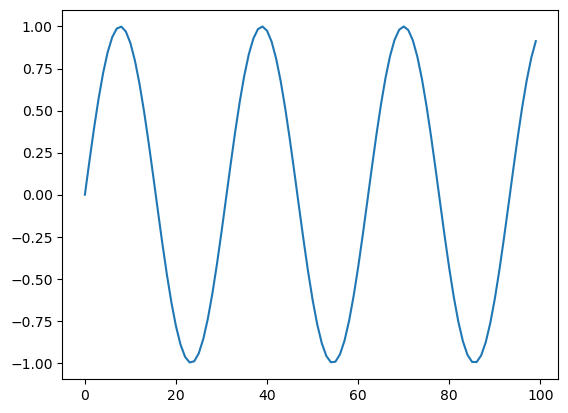

In [31]:
plt.figure()

plt.plot(y)
plt.show()

It has done the plot and the the $y$ values are correct, but the $x$ axis has just been taken as the integer indexes of the array. If we want to label the $x$ axis then we can pass two arguments to `plot`:

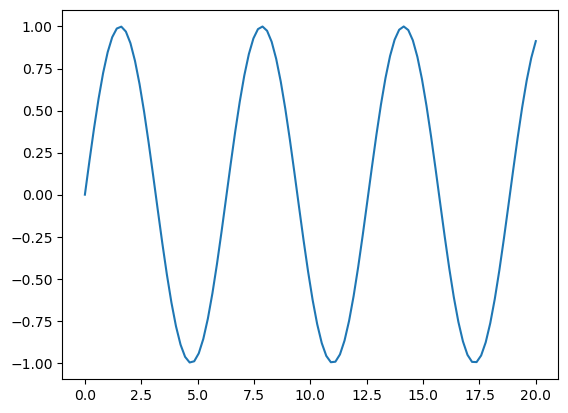

In [32]:
plt.figure()
plt.plot(x, y)
plt.show()

### Exercise : Data manipulation and plotting

- Generate some random data 
- Plot the data as a line graph
- Find the mean average, $\mu$, value in the data
  - Have a look at the [list of statistical functions](https://numpy.org/doc/stable/reference/routines.statistics.html) to find an appropriate one
- Find the standard deviation, $\sigma$, of the data
- Write a function which returns the ratio between the standard deviation and the mean, $\dfrac{\sigma}{\mu}$
- Check that your funtion works with both Python lists as well as the `data` array


In [33]:
import numpy as np
import matplotlib.pyplot as plt

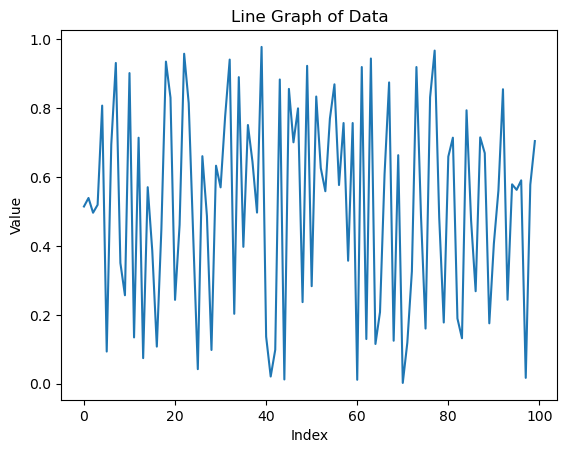

In [34]:

# Generate some random data 
data = np.random.rand(100) # this will generate 100 entries betwen 0 and 1

# Plot the data as a line graph
plt.plot(data)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Graph of Data')
plt.show()


In [35]:

# Calculate mean and standard deviation of the data - you can use the numpy functions np.mean() and np.std()

mean_value = np.mean(data)
std_deviation = np.std(data)

In [36]:
def calculate_ratio(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    ratio = std_dev / mean
    return ratio


In [37]:
# Calculate the ratio between standard deviation and mean using the function
ratio = calculate_ratio(data)

# Print the results
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Ratio (Std Deviation / Mean): {ratio}")


Mean: 0.517481431142758
Standard Deviation: 0.29456959996523235
Ratio (Std Deviation / Mean): 0.5692370435683695


In [38]:
# Check the function with Python lists
data_list = list(data) # convert data array to a list

ratio_list = calculate_ratio(data_list)
print(f"Ratio with Python list: {ratio_list}")


Ratio with Python list: 0.5692370435683695


### Homework Exercise

- Generate an array `x` with 100 evenly spaced values from 0 to 10 (hint: use `numpy.linspace()` to create a range of x-values.
- Generate an array `y` by applying a mathematical expression (sin(x)) to the x array. 
- Generate a new array `y_r` which is equal to `y` + some random noise. Use `numpy.random.normal()` to make the data slightly varied.
- Plot the generated data as a scatter plot using `matplotlib.pyplot.scatter()`. This visualizes the relationship between the x and y values.
- Use `numpy.max()` to find the maximum value in the y array.
- Use `numpy.argmax()` to find the index of the maximum value in the y array.
- Print the maximum value and the index of the maximum value.

Hint: you can display both `y` and `y_r`in the plot, by running `plt.plot` or `plt.scatter` multiple times before `plt.show`. Try plotting `y` with a line `plt.plot(x, y)` and `y_r` with a scatter plot `plt.scatter(x, y_r)`.
play with the `color` parameter to distinguish between the two.

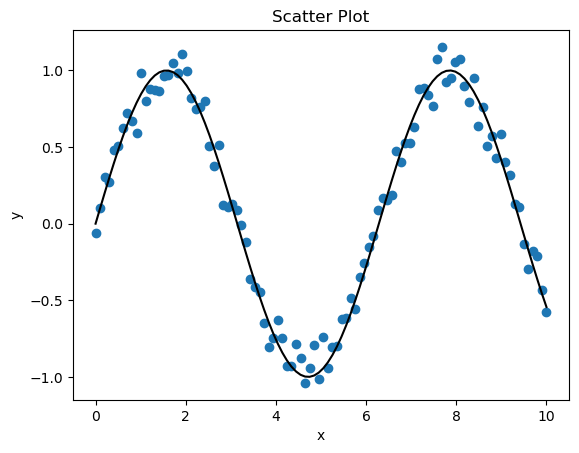

Maximum value: 0.9996923408861117
Index of maximum value: 78


In [39]:
# Generate an array of 100 evenly spaced values from 0 to 10
x = np.linspace(0, 10, 100)

# Generate a corresponding array of y-values using a simple mathematical expression
y = np.sin(x) 
y_r = np.sin(x) + np.random.normal(0, 0.1, size=100)

# Plot the data as a scatter plot
plt.plot(x, y, color='k')
plt.scatter(x, y_r)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.show()

# Find the maximum value in the y array
max_value = np.max(y)

# Find the index of the maximum value in the y array
max_index = np.argmax(y)

# Print the results
print(f"Maximum value: {max_value}")
print(f"Index of maximum value: {max_index}")